## 🔷 What is K-Means Clustering?
K-Means is an unsupervised learning algorithm used to group similar data points into K clusters, where each cluster has a centroid.

## 🧠 How It Works (Step-by-Step)
Choose K (number of clusters)

Randomly initialize K centroids

Assign each point to the nearest centroid (using Euclidean distance)

Update centroids as the mean of points in each cluster

Repeat steps 3–4 until convergence (no change in assignments or centroids)

In [4]:
## K Means 

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

In [7]:
print(X.shape)

(1000, 2)


| Term                 | Meaning                                                    |
| -------------------- | ---------------------------------------------------------- |
| **Centroid**         | Center point of a cluster                                  |
| **Inertia**          | Sum of squared distances of points to their cluster center |
| **Convergence**      | When cluster assignments stop changing                     |
| **Elbow Method**     | Method to choose optimal K by plotting inertia vs K        |
| **Silhouette Score** | Metric to evaluate clustering quality (range -1 to 1)      |


In [8]:
import matplotlib.pyplot as plt

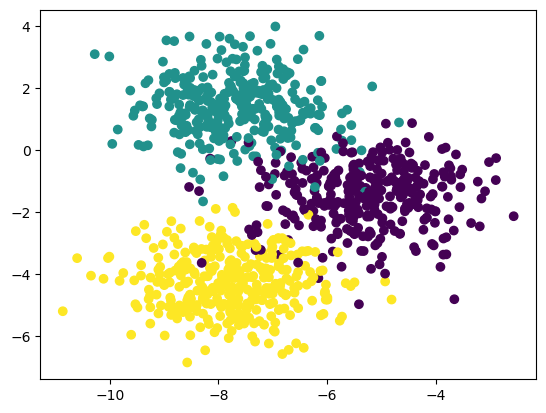

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
from sklearn.cluster import KMeans

In [13]:
## Elbow method to select K Value

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

  File "C:\Users\vishn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vishn\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vishn\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\vishn\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [16]:
wcss

[5629.243943881455,
 2684.2333231669254,
 1175.7140337003702,
 1012.1057026310393,
 902.9490096885731,
 771.3952268188189,
 688.1436307771467,
 577.2435710704665,
 537.5739101879101,
 456.6125077370477]

In [17]:
## plot elbow curve

In [18]:
import matplotlib.pyplot as plt

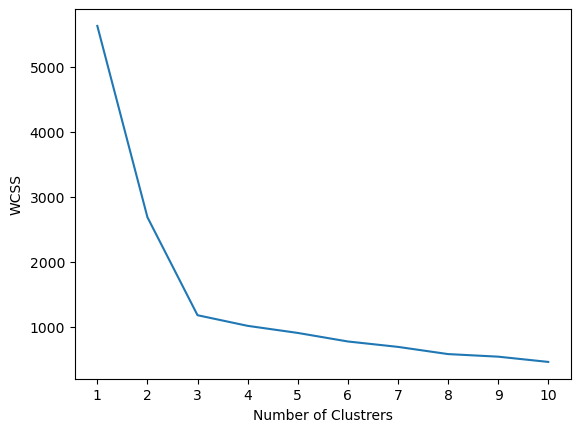

In [19]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [20]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [21]:
y_labels=kmeans.fit_predict(X_train)

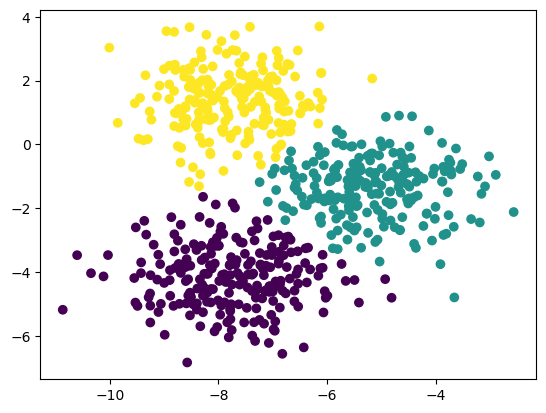

In [22]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [23]:
## knee locator
!pip install kneed

DEPRECATION: Loading egg at c:\users\vishn\anaconda3\lib\site-packages\diamondpriceprediction-0.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [24]:
from kneed import KneeLocator

In [25]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.elbow

3

In [26]:
## Silhoutte score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [28]:
silhouette_coefficients

[0.465144197576904,
 0.5476329353673007,
 0.43807782461390526,
 0.3752371062927015,
 0.32152723707369146,
 0.3199443145459224,
 0.33941627533310204,
 0.3301135909194439,
 0.3287359825927324]

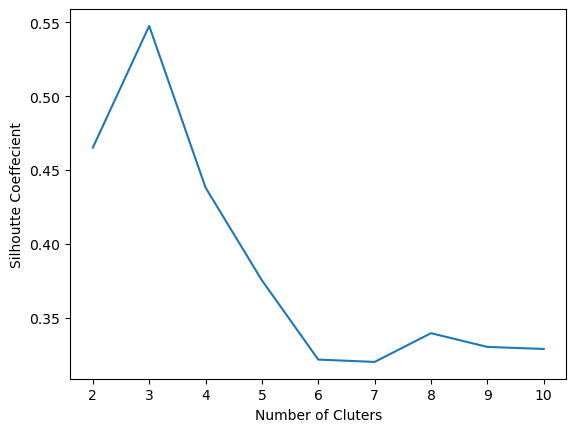

In [29]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()